Submitted by: Fawad Kirmani

Last Modified: 09/25/2021

GitHub Link: https://github.com/fkirmani/csce590-001/tree/main/Project

In [280]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

Load data

In [281]:
input_data = pd.read_csv('./data/pineallas_DataDownload_2425484_row_2015_2021.txt', delimiter="\t", 
                         low_memory=False)  
input_data.head()

WBodyID WaterBodyName    DataSource StationID StationName Actual_StationID  \
0      890   Allen Creek  WIN_21FLPDEM  ="19-08"         NaN         ="19-08"   
1      890   Allen Creek  WIN_21FLPDEM  ="19-08"         NaN         ="19-08"   
2      890   Allen Creek  WIN_21FLPDEM  ="19-08"         NaN         ="19-08"   
3      890   Allen Creek  WIN_21FLPDEM  ="19-08"         NaN         ="19-08"   
4      890   Allen Creek  WIN_21FLPDEM  ="19-08"         NaN         ="19-08"   

   Actual_Latitude  Actual_Longitude DEP_WBID            SampleDate  ...  \
0          27.9407          -82.7596   1604B1  1/30/2018 9:35:00 AM  ...   
1          27.9407          -82.7596   1604B1  1/30/2018 9:35:00 AM  ...   
2          27.9407          -82.7596   1604B1  1/30/2018 9:35:00 AM  ...   
3          27.9407          -82.7596   1604B1  1/30/2018 9:35:00 AM  ...   
4          27.9407          -82.7596   1604B1  1/30/2018 9:35:00 AM  ...   

   DepthUnits    Parameter                           Characteristic  \
0           m    ChlaC_ugl  Chlorophyll a, corrected for pheophytin   
1           m     chlb_ugl                            Chlorophyll b   
2           m     chlc_ugl                            Chlorophyll c   
3           m  Ecoli_100ml                         Escherichia coli   
4           m    NH3_N_ugl                   Nitrogen, ammonia as N   

  Sample_Fraction Result_Value  Result_Unit QACode Result_Comment  \
0           Total          4.3         ug/l    NaN            NaN   
1           Total          0.5         ug/l      U            NaN   
2           Total          0.5         ug/l    NaN            NaN   
3           Total        821.0    cfu/100ml    NaN            NaN   
4           Total         90.0         ug/l    NaN            NaN   

  Original_Result_Value Original_Result_Unit  
0                   4.3                mg/m3  
1                   0.5                mg/m3  
2                   0.5                mg/m3  
3                   821           MPN/100 mL  
4                  0.09                 mg/L  

[5 rows x 21 columns]

In [282]:
input_data.columns

Index(['WBodyID', 'WaterBodyName', 'DataSource', 'StationID', 'StationName',
       'Actual_StationID', 'Actual_Latitude', 'Actual_Longitude', 'DEP_WBID',
       'SampleDate', 'ActivityDepth', 'DepthUnits', 'Parameter',
       'Characteristic', 'Sample_Fraction', 'Result_Value', 'Result_Unit',
       'QACode', 'Result_Comment', 'Original_Result_Value',
       'Original_Result_Unit'],
      dtype='object')

In [283]:
input_data_pivot = input_data.pivot_table(columns="Parameter", 
                       index=["SampleDate", "ActivityDepth", "WBodyID", "Result_Comment"], 
                       values="Result_Value").reset_index()
input_data_pivot

Parameter             SampleDate  ActivityDepth  WBodyID  \
0           1/1/2016 12:00:00 AM       0.500000     5074   
1           1/1/2017 12:00:00 AM       0.500000     5074   
2           1/1/2018 12:00:00 AM       0.500000     5074   
3          1/10/2017 12:00:00 AM       0.457317    14143   
4          1/10/2019 11:10:00 AM       0.500000    20009   
...                          ...            ...      ...   
25211        9/9/2019 9:57:00 AM       0.200000     7382   
25212        9/9/2019 9:57:00 AM       0.200000     7382   
25213        9/9/2019 9:57:00 AM       0.198000     7382   
25214        9/9/2019 9:58:00 AM       0.939000     7382   
25215        9/9/2019 9:59:00 AM       1.872000     7382   

Parameter                                     Result_Comment  245T_ugl  \
0                                 Water Institute Calculated       NaN   
1                                 Water Institute Calculated       NaN   
2                                 Water Institute Calculated       NaN   
3                                                      **U**       NaN   
4                                                          D       NaN   
...                                                      ...       ...   
25211      I - Final dried residue < 2.5 mg as req'd by m...       NaN   
25212             Sample fraction omitted per WIN guidelines       NaN   
25213                                   no visible particles       NaN   
25214                                   no visible particles       NaN   
25215                                   no visible particles       NaN   

Parameter  24D_ugl  3Hydroxycarbofuran_ugl  Acifluorfen_ugl  Ag_ugl  Al_ugl  \
0              NaN                     NaN              NaN     NaN     NaN   
1              NaN                     NaN              NaN     NaN     NaN   
2              NaN                     NaN              NaN     NaN     NaN   
3              NaN                     NaN              NaN     NaN     NaN   
4              NaN                     NaN              NaN     NaN     NaN   
...            ...                     ...              ...     ...     ...   
25211          NaN                     NaN              NaN     NaN     NaN   
25212          NaN                     NaN              NaN     NaN     NaN   
25213          NaN                     NaN              NaN     NaN     NaN   
25214          NaN                     NaN              NaN     NaN     NaN   
25215          NaN                     NaN              NaN     NaN     NaN   

Parameter  ...  Toxaphene_ugl  Turb_ntu  Zn_ugl  alphaBHC_ugl  betaBHC_ugl  \
0          ...            NaN       NaN     NaN           NaN          NaN   
1          ...            NaN       NaN     NaN           NaN          NaN   
2          ...            NaN       NaN     NaN           NaN          NaN   
3          ...            NaN       NaN     NaN           NaN          NaN   
4          ...            NaN       NaN     NaN           NaN          NaN   
...        ...            ...       ...     ...           ...          ...   
25211      ...            NaN       NaN     NaN           NaN          NaN   
25212      ...            NaN       1.8     NaN           NaN          NaN   
25213      ...            NaN       NaN     NaN           NaN          NaN   
25214      ...            NaN       NaN     NaN           NaN          NaN   
25215      ...            NaN       NaN     NaN           NaN          NaN   

Parameter  chlb_ugl  chlc_ugl  diazinon_ugl  hardness_mglCaCO3    pH  
0               NaN       NaN           NaN                NaN   NaN  
1               NaN       NaN           NaN                NaN   NaN  
2               NaN       NaN           NaN                NaN   NaN  
3               NaN       NaN           NaN                NaN   NaN  
4               NaN       NaN           NaN                NaN   NaN  
...             ...       ...           ...                ...   ...  
25211  

In [284]:
input_data_pivot.rename(columns={'Sucralose_ug/l':'Sucralose_ugl'}, inplace=True)

In [285]:
# input_data_pivot_algal = input_data_pivot[input_data_pivot['Result_Comment'].str.contains('algal' or 'algae')]

In [286]:
# input_data_pivot_algal.shape

summarizing statistics of input_data_pivot dataframe

In [287]:
summary = input_data_pivot.describe()
print(summary.columns)
summary

Index(['ActivityDepth', 'WBodyID', '245T_ugl', '24D_ugl',
       '3Hydroxycarbofuran_ugl', 'Acifluorfen_ugl', 'Ag_ugl', 'Al_ugl',
       'Alachlor_ugl', 'Aldicarb_ugl',
       ...
       'Toxaphene_ugl', 'Turb_ntu', 'Zn_ugl', 'alphaBHC_ugl', 'betaBHC_ugl',
       'chlb_ugl', 'chlc_ugl', 'diazinon_ugl', 'hardness_mglCaCO3', 'pH'],
      dtype='object', name='Parameter', length=146)


Parameter  ActivityDepth       WBodyID  245T_ugl     24D_ugl  \
count       25216.000000  2.521600e+04     1.000  127.000000   
mean            0.670188  1.768264e+04     0.002    0.167666   
std             0.908931  1.508662e+05       NaN    0.741075   
min            -0.018862  1.500000e+01     0.002    0.002000   
25%             0.200000  9.620000e+02     0.002    0.005500   
50%             0.260000  2.000000e+04     0.002    0.018000   
75%             0.764000  2.000900e+04     0.002    0.073000   
max             9.300000  4.000041e+06     0.002    6.700000   

Parameter  3Hydroxycarbofuran_ugl  Acifluorfen_ugl    Ag_ugl      Al_ugl  \
count                       1.000            1.000  8.000000  116.000000   
mean                        0.002            0.002  0.025000   52.250000   
std                           NaN              NaN  0.016036   68.576653   
min                         0.002            0.002  0.010000    6.300000   
25%                         0.002            0.002  0.010000   20.000000   
50%                         0.002            0.002  0.025000   29.000000   
75%                         0.002            0.002  0.040000   56.000000   
max                         0.002            0.002  0.040000  534.000000   

Parameter  Alachlor_ugl  Aldicarb_ugl  ...  Toxaphene_ugl     Turb_ntu  \
count         30.000000          1.00  ...       3.000000  3481.000000   
mean           0.012234          0.02  ...       0.031667     3.511514   
std            0.065683           NaN  ...       0.001155    28.964917   
min            0.000230          0.02  ...       0.031000     0.100000   
25%            0.000240          0.02  ...       0.031000     1.300000   
50%            0.000240          0.02  ...       0.031000     2.000000   
75%            0.000247          0.02  ...       0.032000     3.400000   
max            0.360000          0.02  ...       0.033000  1700.000000   

Parameter     Zn_ugl  alphaBHC_ugl  betaBHC_ugl     chlb_ugl     chlc_ugl  \
count      26.000000     24.000000    24.000000  2471.000000  2476.000000   
mean        9.153846      0.002062     0.005188     0.722278     1.311167   
std         5.091108      0.000065     0.002426     1.648807     1.828484   
min         3.500000      0.001900     0.001900     0.200000     0.400000   
25%         5.000000      0.002000     0.004100     0.500000     0.500000   
50%         5.850000      0.002100     0.004100     0.500000     0.800000   
75%        15.000000      0.002100     0.004225     0.500000     1.500000   
max        20.000000      0.002200     0.011000    52.200000    49.300000   

Parameter  diazinon_ugl  hardness_mglCaCO3            pH  
count         29.000000                1.0  10685.000000  
mean           0.000144               78.8      7.892637  
std            0.000107                NaN      0.484363  
min            0.000120               78.8      2.250000  
25%            0.000120               78.8      7.630000  
50%            0.000120               78.8      8.010000  
75%            0.000120               78.8      8.170000  
max            0.000690               78.8     12.970000  

[8 rows x 146 columns]

Not every parameter is measured on every date the survey of water is conducted.

In [288]:
input_data_algal_no_null_columns = input_data_pivot.dropna(axis=1, how='all')
input_data_algal_no_null_columns

Parameter             SampleDate  ActivityDepth  WBodyID  \
0           1/1/2016 12:00:00 AM       0.500000     5074   
1           1/1/2017 12:00:00 AM       0.500000     5074   
2           1/1/2018 12:00:00 AM       0.500000     5074   
3          1/10/2017 12:00:00 AM       0.457317    14143   
4          1/10/2019 11:10:00 AM       0.500000    20009   
...                          ...            ...      ...   
25211        9/9/2019 9:57:00 AM       0.200000     7382   
25212        9/9/2019 9:57:00 AM       0.200000     7382   
25213        9/9/2019 9:57:00 AM       0.198000     7382   
25214        9/9/2019 9:58:00 AM       0.939000     7382   
25215        9/9/2019 9:59:00 AM       1.872000     7382   

Parameter                                     Result_Comment  245T_ugl  \
0                                 Water Institute Calculated       NaN   
1                                 Water Institute Calculated       NaN   
2                                 Water Institute Calculated       NaN   
3                                                      **U**       NaN   
4                                                          D       NaN   
...                                                      ...       ...   
25211      I - Final dried residue < 2.5 mg as req'd by m...       NaN   
25212             Sample fraction omitted per WIN guidelines       NaN   
25213                                   no visible particles       NaN   
25214                                   no visible particles       NaN   
25215                                   no visible particles       NaN   

Parameter  24D_ugl  3Hydroxycarbofuran_ugl  Acifluorfen_ugl  Ag_ugl  Al_ugl  \
0              NaN                     NaN              NaN     NaN     NaN   
1              NaN                     NaN              NaN     NaN     NaN   
2              NaN                     NaN              NaN     NaN     NaN   
3              NaN                     NaN              NaN     NaN     NaN   
4              NaN                     NaN              NaN     NaN     NaN   
...            ...                     ...              ...     ...     ...   
25211          NaN                     NaN              NaN     NaN     NaN   
25212          NaN                     NaN              NaN     NaN     NaN   
25213          NaN                     NaN              NaN     NaN     NaN   
25214          NaN                     NaN              NaN     NaN     NaN   
25215          NaN                     NaN              NaN     NaN     NaN   

Parameter  ...  Toxaphene_ugl  Turb_ntu  Zn_ugl  alphaBHC_ugl  betaBHC_ugl  \
0          ...            NaN       NaN     NaN           NaN          NaN   
1          ...            NaN       NaN     NaN           NaN          NaN   
2          ...            NaN       NaN     NaN           NaN          NaN   
3          ...            NaN       NaN     NaN           NaN          NaN   
4          ...            NaN       NaN     NaN           NaN          NaN   
...        ...            ...       ...     ...           ...          ...   
25211      ...            NaN       NaN     NaN           NaN          NaN   
25212      ...            NaN       1.8     NaN           NaN          NaN   
25213      ...            NaN       NaN     NaN           NaN          NaN   
25214      ...            NaN       NaN     NaN           NaN          NaN   
25215      ...            NaN       NaN     NaN           NaN          NaN   

Parameter  chlb_ugl  chlc_ugl  diazinon_ugl  hardness_mglCaCO3    pH  
0               NaN       NaN           NaN                NaN   NaN  
1               NaN       NaN           NaN                NaN   NaN  
2               NaN       NaN           NaN                NaN   NaN  
3               NaN       NaN           NaN                NaN   NaN  
4               NaN       NaN           NaN                NaN   NaN  
...             ...       ...           ...                ...   ...  
25211  

#### creating labels for algal bloom

In [289]:
search = ['algal', 'algae']

In [290]:
input_data_pivot.loc[~input_data_pivot['Result_Comment'].str.contains('&'.join(search)),'label1'] = 0

input_data_pivot.loc[input_data_pivot['Result_Comment'].str.contains("no evidence of algal bloom"),'label1'] = 0
input_data_pivot.loc[input_data_pivot['Result_Comment'].str.contains("no visible algal bloom"),'label1'] = 0
# input_data_pivot.loc[input_data_pivot['Result_Comment'].str.contains("no visible particle film"),'label1'] = 0
# input_data_pivot.loc[input_data_pivot['Result_Comment'].str.contains("green color, slight film on filter"),'label1'] = 0
# input_data_pivot.loc[input_data_pivot['Result_Comment'].str.contains("slight film on filter"),'label1'] = 0
# input_data_pivot.loc[input_data_pivot['Result_Comment'].str.contains(", clean filter"),'label1'] = 0
# input_data_pivot.loc[input_data_pivot['Result_Comment'].str.contains("normal distribution potential outlier"),'label1'] = 0
input_data_pivot.loc[input_data_pivot['Result_Comment'].str.contains("suspected algal bloom"),'label1'] = 1
input_data_pivot.loc[input_data_pivot['Result_Comment'].str.contains("suspect pyrodinium algal bloom"),'label1'] = 1
input_data_pivot.loc[input_data_pivot['Result_Comment'].str.contains("suspect algal bloom"),'label1'] = 1
input_data_pivot.loc[input_data_pivot['Result_Comment'].str.contains("algal bloom evidence"),'label1'] = 2
input_data_pivot.loc[input_data_pivot['Result_Comment'].str.contains("evidence of algal bloom"),'label1'] = 2
input_data_pivot.loc[input_data_pivot['Result_Comment'].str.contains(", algal bloom"),'label1'] = 2
input_data_pivot.loc[input_data_pivot['Result_Comment'].str.contains("dense algae"),'label1'] = 3
input_data_pivot.loc[input_data_pivot['Result_Comment'].str.contains("dense algal growth"),'label1'] = 3
input_data_pivot.loc[input_data_pivot['Result_Comment'].str.contains("suspect increased algal productivity"),'label1'] = 3
input_data_pivot.loc[input_data_pivot['Result_Comment'].str.contains("algae detritus"),'label1'] = 3
input_data_pivot.loc[input_data_pivot['Result_Comment'].str.contains("algal detritus"),'label1'] = 3
input_data_pivot.loc[input_data_pivot['Result_Comment'].str.contains("heavy algal epiphytes"),'label1'] = 3
input_data_pivot.loc[input_data_pivot['Result_Comment'].str.contains("algal epiphytes"),'label1'] = 3
input_data_pivot.loc[input_data_pivot['Result_Comment'].str.contains("decayed algal debris"),'label1'] = 3
input_data_pivot.loc[input_data_pivot['Result_Comment'].str.contains("brown green algal colonies"),'label1'] = 3
input_data_pivot.loc[input_data_pivot['Result_Comment'].str.contains("algal debris"),'label1'] = 3
input_data_pivot.loc[input_data_pivot['Result_Comment'].str.contains("red tide algal bloom"),'label1'] = 3
input_data_pivot.loc[input_data_pivot['Result_Comment'].str.contains("thick algal growth altering flow"),'label1'] = 3
input_data_pivot.loc[input_data_pivot['Result_Comment'].str.contains("stagnant turbid algal growth"),'label1'] = 3
input_data_pivot.loc[input_data_pivot['Result_Comment'].str.contains("algal gr"),'label1'] = 3
input_data_pivot.loc[input_data_pivot['Result_Comment'].str.contains("green algal mats"),'label1'] = 3
input_data_pivot.loc[input_data_pivot['Result_Comment'].str.contains("thic algal lining"),'label1'] = 3
input_data_pivot.loc[input_data_pivot['Result_Comment'].str.contains("algal colonies"),'label1'] = 3
input_data_pivot.loc[input_data_pivot['Result_Comment'].str.contains("dense living and decaying algae"),'label1'] = 3
input_data_pivot.loc[input_data_pivot['Result_Comment'].str.contains("algae and floating vegetation"),'label1'] = 3

In [291]:
input_data_pivot[['Result_Comment', 'label1']].loc[1111]

Parameter
Result_Comment      D
label1            0.0
Name: 1111, dtype: object

In [292]:
input_data_pivot[input_data_pivot['label1'].isnull()]

Empty DataFrame
Columns: [SampleDate, ActivityDepth, WBodyID, Result_Comment, 245T_ugl, 24D_ugl, 3Hydroxycarbofuran_ugl, Acifluorfen_ugl, Ag_ugl, Al_ugl, Alachlor_ugl, Aldicarb_ugl, Aldicarbsulfone_ugl, Aldicarbsulfoxide_ugl, Aldrin_ugl, Alk_CaCO3_mgl, Ametryne_ugl, Anatoxin_ugl, As_ugl, Atrazine_ugl, Azinphosmethyl_ugl, BOD5_mgl, BODultcarbonaceous_ugl, B_ugl, Ba_ugl, Be_ugl, BicarbAlk_mgl, Bromacil_ugl, Bromide_mgl, Butylate_ugl, C_organic_mgl, Ca_mgl, CarbAlk_mgl, Carbofuran_ugl, Carbophenothion_ugl, Cd_ugl, ChlaC_ugl, Chla_ugl, Chlordane_ugl, Chloropyrifos_ugl, Chlorpyrifosmethyl_ugl, Cl_mgl, Co_ugl, Color_apparent_pcu, Color_true_pcu, Cond_umhocm, Cr_ugl, Cu_ugl, DBHC_ugl, DDE_ugl, DO_mgl, DO_percent, Demeton_ugl, Depth_bott_ft, Depth_ft, Desethylatrazine_ugl, Dichlorprop_ugl, Dicofol_ugl, Dieldrin_ugl, Disulfoton_ugl, Diuron_ugl, Ecoccus_100ml, Ecoli_100ml, EndosulfanII_ugl, EndosulfanI_ugl, EndosulfanSO4_ugl, Endothall_ugl, EndrinAldehyde_ugl, Endrin_ugl, Endrinketone_ugl, Ethion_ugl, Ethoprop_ugl, F_mgl, Fcoli_100ml, Fe_ugl, Fenamiphos_ugl, Fluoranthene_ugl, Gage_ft, Glyphosate_ugl, HeptachlorEpoxide_ugl, Heptachlor_ugl, Hexazinone_ugl, K_mgl, Lindane_ugl, Linuron_ugl, MCPP_ugl, Malathion_ugl, Metalaxyl_ugl, MethParathion_ugl, Methomyl_ugl, Methoxychlor_ugl, Metolachlor_ugl, Metribuzin_ugl, Mg_mgl, Mirex_ugl, Mn_ugl, Mo_ugl, NH3_N_ugl, NH4_ugl, NO2_ugl, ...]
Index: []

[0 rows x 149 columns]

In [293]:
len(input_data_pivot['Result_Comment'].unique())

5312

Percentage of missing values in each parameter

In [294]:
for i in range(len(input_data_pivot.columns)):
    missing_data = input_data_pivot[input_data_pivot.columns[i]].isna().sum()
    perc = missing_data / len(input_data_pivot) * 100
    print('>%d,  missing entries: %d, percentage %.2f' % (i, missing_data, perc))

>0,  missing entries: 0, percentage 0.00
>1,  missing entries: 0, percentage 0.00
>2,  missing entries: 0, percentage 0.00
>3,  missing entries: 0, percentage 0.00
>4,  missing entries: 25215, percentage 100.00
>5,  missing entries: 25089, percentage 99.50
>6,  missing entries: 25215, percentage 100.00
>7,  missing entries: 25215, percentage 100.00
>8,  missing entries: 25208, percentage 99.97
>9,  missing entries: 25100, percentage 99.54
>10,  missing entries: 25186, percentage 99.88
>11,  missing entries: 25215, percentage 100.00
>12,  missing entries: 25215, percentage 100.00
>13,  missing entries: 25215, percentage 100.00
>14,  missing entries: 25192, percentage 99.90
>15,  missing entries: 25011, percentage 99.19
>16,  missing entries: 25183, percentage 99.87
>17,  missing entries: 25211, percentage 99.98
>18,  missing entries: 25207, percentage 99.96
>19,  missing entries: 25176, percentage 99.84
>20,  missing entries: 25187, percentage 99.88
>21,  missing entries: 24456, percent

Heatmap of missing values in each parameter/column

<AxesSubplot:xlabel='Parameter'>

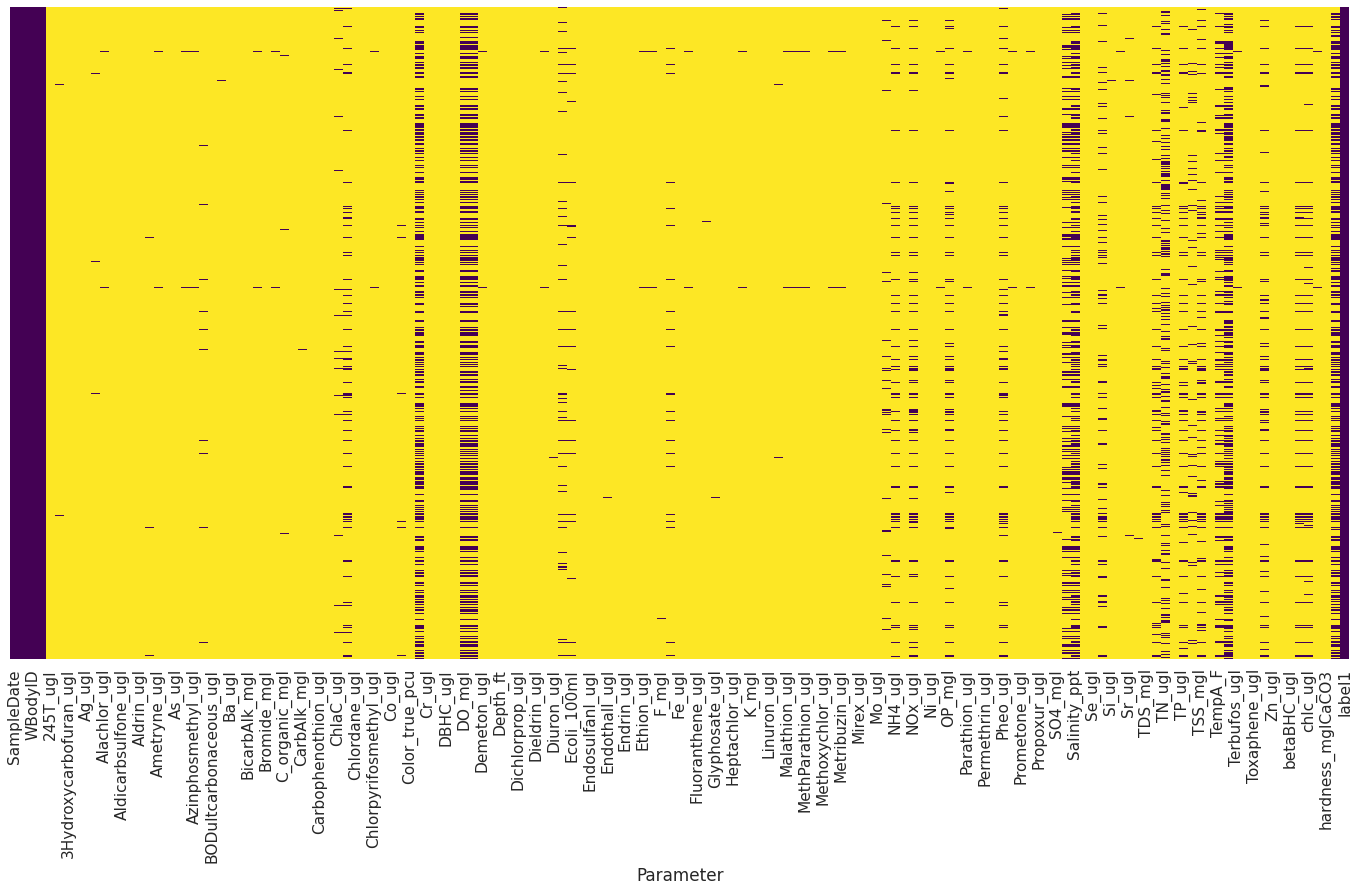

In [295]:
plt.rcParams["figure.figsize"] = [24, 12]
sns.heatmap(input_data_pivot.isna(), cbar=False, cmap='viridis', yticklabels=False)

From above figure, we can observe there are lot of missing data in every column except "SampleDate" and "ActivityDepth" which have no missing value.

##### Correlation Heatmap with label 1

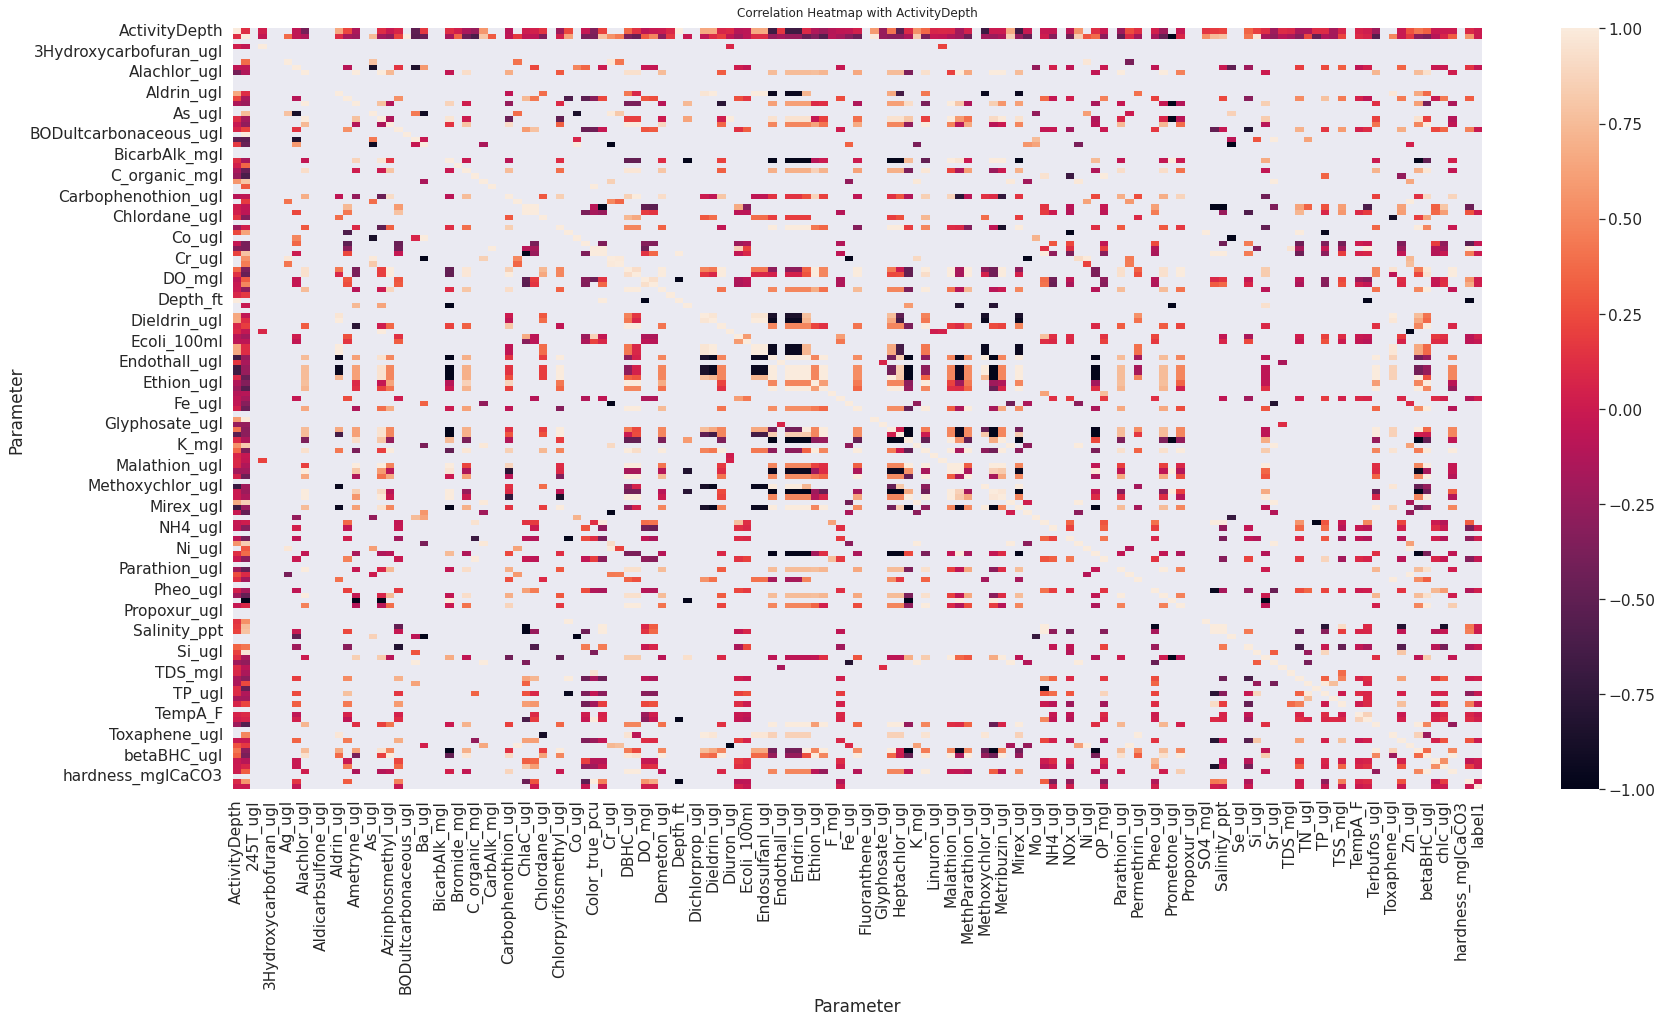

In [296]:
corr1 = input_data_pivot.corr()
# mask = np.triu(np.ones_like(input_data_pivot.corr(), dtype=bool))

# plotting the heatmap
plt.rcParams["figure.figsize"] = [28, 14]
heatmap = sns.heatmap(corr1)
heatmap.set_title('Correlation Heatmap with ActivityDepth', fontdict={'fontsize':12}, pad=12);

Two Highest correlation: One is self and other is with different feature. We are concenred with other features not same feature for correlation.

In [468]:
corr1.reset_index()
for i, col in enumerate(corr1.columns):
    try:
        top = pd.DataFrame(corr1[(corr1[col]>0.9) | (corr1[col]<-0.9)][col].nlargest(8).to_frame()).reset_index()
        top = top.drop(top[top["Parameter"]==col].index)
        if top.empty:
            pass
        else: 
            print(top)
            print("\n")
    except:
        pass

  Parameter  ActivityDepth
1  Depth_ft            1.0


                Parameter   WBodyID
1  BODultcarbonaceous_ugl  1.000000
2                 Gage_ft  0.987103
3                  Si_ugl  0.972830
4           Prometone_ugl -1.000000


  Parameter    Ag_ugl
1    Cr_ugl  0.969717
2    Ni_ugl  0.969714


         Parameter  Alachlor_ugl
1    Parathion_ugl      1.000000
2      Phorate_ugl      1.000000
3  Metolachlor_ugl      0.999954
4    Metalaxyl_ugl      0.999951
5     Ametryne_ugl      0.999945
6   Metribuzin_ugl      0.999851
7     Atrazine_ugl      0.998943


            Parameter  Aldrin_ugl
1        Dieldrin_ugl    1.000000
2    EndosulfanII_ugl    1.000000
3     EndosulfanI_ugl    1.000000
4       Toxaphene_ugl    0.970725
5         Dicofol_ugl    0.965337
6   EndosulfanSO4_ugl   -0.940712
7  EndrinAldehyde_ugl   -0.940712


        Parameter  Ametryne_ugl
1    Alachlor_ugl      0.999945
2   Malathion_ugl      0.999695
3  Hexazinone_ugl      0.924660
4   Prometone_ugl     -1.0

In [298]:
import math as mt

import xgboost as xgb
from matplotlib import pyplot
from numpy import sort
from scipy import interp
from itertools import cycle
from sklearn.feature_selection import SelectFromModel, f_classif
from sklearn.feature_selection import SelectKBest, chi2, RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.model_selection import train_test_split
import seaborn as sn

In [299]:
input_data_pivot['label2'] = np.where(input_data_pivot['label1']==0, 0, 1)
input_data_algal_label2 = input_data_pivot.drop(columns=['label1'])
input_data_algal_label2.shape

(25216, 149)

##### Correlation Heatmap with label 2

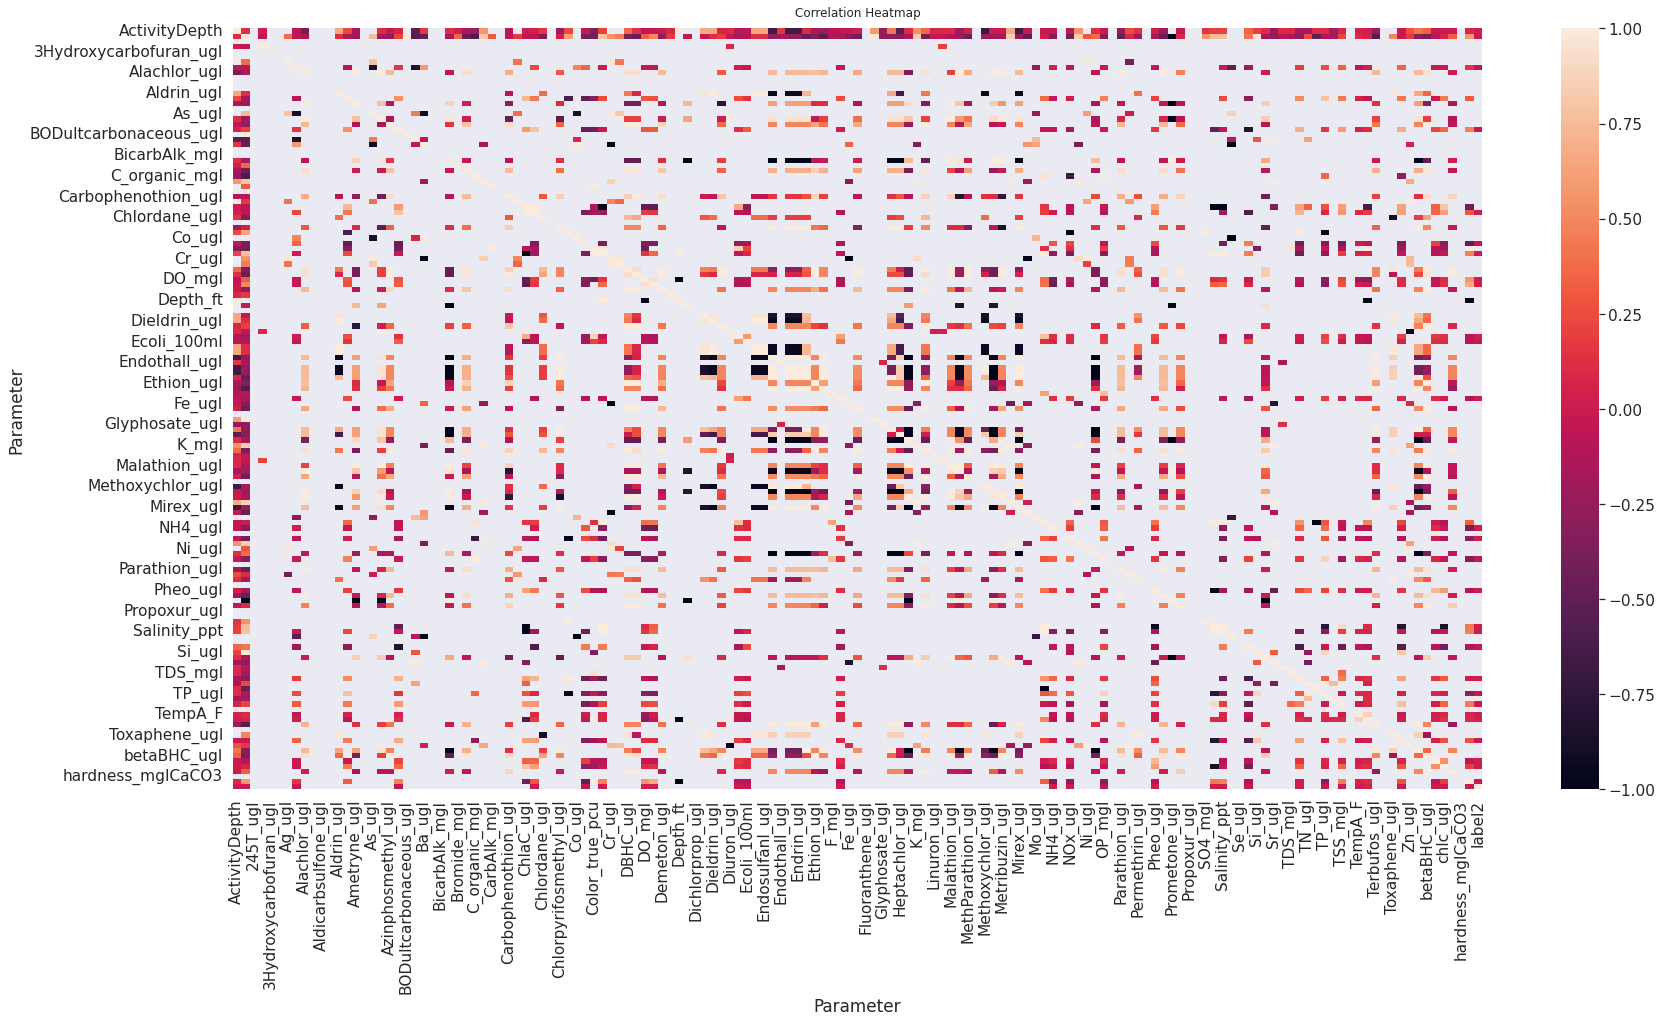

In [300]:
corr2 = input_data_algal_label2.corr()
# mask = np.triu(np.ones_like(input_data_pivot.corr(), dtype=bool))

# plotting the heatmap
plt.rcParams["figure.figsize"] = [28, 14]
heatmap = sns.heatmap(corr2)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [301]:
corr2.reset_index()
for i, col in enumerate(corr2.columns):
    try:
        top = pd.DataFrame(corr2[(corr2[col]>0.9) | (corr2[col]<-0.9)][col].nlargest(8).to_frame()).reset_index()
        top = top.drop(top[top["Parameter"]==col].index)
        if top.empty:
            pass
        else: 
            print(top)
            print("\n")
    except:
        pass

  Parameter  ActivityDepth
1  Depth_ft            1.0


                Parameter   WBodyID
1  BODultcarbonaceous_ugl  1.000000
2                 Gage_ft  0.987103
3                  Si_ugl  0.972830
4           Prometone_ugl -1.000000


  Parameter    Ag_ugl
1    Cr_ugl  0.969717
2    Ni_ugl  0.969714


         Parameter  Alachlor_ugl
1    Parathion_ugl      1.000000
2      Phorate_ugl      1.000000
3  Metolachlor_ugl      0.999954
4    Metalaxyl_ugl      0.999951
5     Ametryne_ugl      0.999945
6   Metribuzin_ugl      0.999851
7     Atrazine_ugl      0.998943


            Parameter  Aldrin_ugl
1        Dieldrin_ugl    1.000000
2    EndosulfanII_ugl    1.000000
3     EndosulfanI_ugl    1.000000
4       Toxaphene_ugl    0.970725
5         Dicofol_ugl    0.965337
6   EndosulfanSO4_ugl   -0.940712
7  EndrinAldehyde_ugl   -0.940712


        Parameter  Ametryne_ugl
1    Alachlor_ugl      0.999945
2   Malathion_ugl      0.999695
3  Hexazinone_ugl      0.924660
4   Prometone_ugl     -1.0

In [303]:
input_data_algal_imputed = input_data_algal_label2.drop(columns=['Result_Comment', 'SampleDate', 'WBodyID']) #, 'Al_ugl', 'BOD5_mgl', 'Color_apparent_pcu'

# Imputing missing values
imputer = SimpleImputer(missing_values=np.NaN, strategy='mean')
for i in range(len(input_data_algal_imputed.columns)):
    input_data_algal_imputed[input_data_algal_imputed.columns[i]] = imputer.fit_transform(input_data_algal_imputed[input_data_algal_imputed.columns[i]].values.reshape(-1,1))[:,0]

input_data_algal_imputed

Parameter  ActivityDepth  245T_ugl   24D_ugl  3Hydroxycarbofuran_ugl  \
0               0.500000     0.002  0.167666                   0.002   
1               0.500000     0.002  0.167666                   0.002   
2               0.500000     0.002  0.167666                   0.002   
3               0.457317     0.002  0.167666                   0.002   
4               0.500000     0.002  0.167666                   0.002   
...                  ...       ...       ...                     ...   
25211           0.200000     0.002  0.167666                   0.002   
25212           0.200000     0.002  0.167666                   0.002   
25213           0.198000     0.002  0.167666                   0.002   
25214           0.939000     0.002  0.167666                   0.002   
25215           1.872000     0.002  0.167666                   0.002   

Parameter  Acifluorfen_ugl  Ag_ugl  Al_ugl  Alachlor_ugl  Aldicarb_ugl  \
0                    0.002   0.025   52.25      0.012234          0.02   
1                    0.002   0.025   52.25      0.012234          0.02   
2                    0.002   0.025   52.25      0.012234          0.02   
3                    0.002   0.025   52.25      0.012234          0.02   
4                    0.002   0.025   52.25      0.012234          0.02   
...                    ...     ...     ...           ...           ...   
25211                0.002   0.025   52.25      0.012234          0.02   
25212                0.002   0.025   52.25      0.012234          0.02   
25213                0.002   0.025   52.25      0.012234          0.02   
25214                0.002   0.025   52.25      0.012234          0.02   
25215                0.002   0.025   52.25      0.012234          0.02   

Parameter  Aldicarbsulfone_ugl  ...  Turb_ntu    Zn_ugl  alphaBHC_ugl  \
0                        0.002  ...  3.511514  9.153846      0.002063   
1                        0.002  ...  3.511514  9.153846      0.002063   
2                        0.002  ...  3.511514  9.153846      0.002063   
3                        0.002  ...  3.511514  9.153846      0.002063   
4                        0.002  ...  3.511514  9.153846      0.002063   
...                        ...  ...       ...       ...           ...   
25211                    0.002  ...  3.511514  9.153846      0.002063   
25212                    0.002  ...  1.800000  9.153846      0.002063   
25213                    0.002  ...  3.511514  9.153846      0.002063   
25214                    0.002  ...  3.511514  9.153846      0.002063   
25215                    0.002  ...  3.511514  9.153846      0.002063   

Parameter  betaBHC_ugl  chlb_ugl  chlc_ugl  diazinon_ugl  hardness_mglCaCO3  \
0             0.005188  0.722278  1.311167      0.000144               78.8   
1             0.005188  0.722278  1.311167      0.000144               78.8   
2             0.005188  0.722278  1.311167      0.000144               78.8   
3             0.005188  0.722278  1.311167      0.000144               78.8   
4             0.005188  0.722278  1.311167      0.000144               78.8   
...                ...       ...       ...           ...                ...   
25211         0.005188  0.722278  1.311167      0.000144               78.8   
25212         0.005188  0.722278  1.311167      0.000144               78.8   
25213         0.005188  0.722278  1.311167      0.000144               78.8   
25214         0.005188  0.722278  1.311167      0.000144               78.8   
25215         0.005188  0.722278  1.311167      0.000144               78.8   

Parameter        pH  label2  
0          7.892637     0.0  
1          7.892637     0.0  
2          7.892637     0.0  
3          7.892637     0.0  
4          7.892637     0.0  
...             ...     ...  
25211      7.892637     0.0  
25212      7.892637     0.0  
25213      7.930000     0.0  
25214      7.830000     0.0  
25215      7.570000     0.0  

[25216 rows x 146 columns]

In [304]:
summary = input_data_algal_imputed.describe()
print(summary.columns)
summary

Index(['ActivityDepth', '245T_ugl', '24D_ugl', '3Hydroxycarbofuran_ugl',
       'Acifluorfen_ugl', 'Ag_ugl', 'Al_ugl', 'Alachlor_ugl', 'Aldicarb_ugl',
       'Aldicarbsulfone_ugl',
       ...
       'Turb_ntu', 'Zn_ugl', 'alphaBHC_ugl', 'betaBHC_ugl', 'chlb_ugl',
       'chlc_ugl', 'diazinon_ugl', 'hardness_mglCaCO3', 'pH', 'label2'],
      dtype='object', name='Parameter', length=146)


Parameter  ActivityDepth      245T_ugl       24D_ugl  3Hydroxycarbofuran_ugl  \
count       25216.000000  2.521600e+04  25216.000000            2.521600e+04   
mean            0.670188  2.000000e-03      0.167666            2.000000e-03   
std             0.908931  6.214770e-16      0.052386            6.214770e-16   
min            -0.018862  2.000000e-03      0.002000            2.000000e-03   
25%             0.200000  2.000000e-03      0.167666            2.000000e-03   
50%             0.260000  2.000000e-03      0.167666            2.000000e-03   
75%             0.764000  2.000000e-03      0.167666            2.000000e-03   
max             9.300000  2.000000e-03      6.700000            2.000000e-03   

Parameter  Acifluorfen_ugl        Ag_ugl        Al_ugl  Alachlor_ugl  \
count         2.521600e+04  25216.000000  25216.000000  25216.000000   
mean          2.000000e-03      0.025000     52.250000      0.012234   
std           6.214770e-16      0.000267      4.631223      0.002228   
min           2.000000e-03      0.010000      6.300000      0.000230   
25%           2.000000e-03      0.025000     52.250000      0.012234   
50%           2.000000e-03      0.025000     52.250000      0.012234   
75%           2.000000e-03      0.025000     52.250000      0.012234   
max           2.000000e-03      0.040000    534.000000      0.360000   

Parameter  Aldicarb_ugl  Aldicarbsulfone_ugl  ...      Turb_ntu        Zn_ugl  \
count      2.521600e+04         2.521600e+04  ...  25216.000000  25216.000000   
mean       2.000000e-02         2.000000e-03  ...      3.511514      9.153846   
std        6.692696e-15         6.214770e-16  ...     10.760499      0.160307   
min        2.000000e-02         2.000000e-03  ...      0.100000      3.500000   
25%        2.000000e-02         2.000000e-03  ...      3.511514      9.153846   
50%        2.000000e-02         2.000000e-03  ...      3.511514      9.153846   
75%        2.000000e-02         2.000000e-03  ...      3.511514      9.153846   
max        2.000000e-02         2.000000e-03  ...   1700.000000     20.000000   

Parameter  alphaBHC_ugl   betaBHC_ugl      chlb_ugl      chlc_ugl  \
count      25216.000000  25216.000000  25216.000000  25216.000000   
mean           0.002063      0.005188      0.722278      1.311167   
std            0.000002      0.000073      0.516047      0.572861   
min            0.001900      0.001900      0.200000      0.400000   
25%            0.002063      0.005188      0.722278      1.311167   
50%            0.002063      0.005188      0.722278      1.311167   
75%            0.002063      0.005188      0.722278      1.311167   
max            0.002200      0.011000     52.200000     49.300000   

Parameter  diazinon_ugl  hardness_mglCaCO3            pH        label2  
count      25216.000000       2.521600e+04  25216.000000  25216.000000  
mean           0.000144       7.880000e+01      7.892637      0.006900  
std            0.000004       3.210296e-11      0.315288      0.082783  
min            0.000120       7.880000e+01      2.250000      0.000000  
25%            0.000144       7.880000e+01      7.892637      0.000000  
50%            0.000144       7.880000e+01      7.892637      0.000000  
75%            0.000144       7.880000e+01      7.910000      0.000000  
max            0.000690       7.880000e+01     12.970000      1.000000  

[8 rows x 146 columns]

In [305]:
X_train, X_test, y_train, y_test = train_test_split(input_data_algal_imputed.iloc[:,0:145], input_data_algal_imputed.iloc[:,145], 
                                                    random_state=42, test_size=0.8)

In [306]:
X_train = X_train.astype('float')
y_train = y_train.astype('int')
X_test = X_test.astype('float')
y_test = y_test.astype('int')

In [307]:
df_train_balanced_One = input_data_algal_imputed.loc[input_data_algal_imputed['label2'] == 1]
print(len(df_train_balanced_One))
df_train_balanced_Zero = input_data_algal_imputed.loc[input_data_algal_imputed['label2'] == 0]
print(len(df_train_balanced_Zero))

174
25042


### XGBoost Classifier

In [308]:
max_depth = [2, 3, 5]
learning_rate = [0.01, 0.1]
n_estimators = [100, 300, 500]
use_label_encoder = [False]
eval_metric = ['error']
random_state = [80]
n_jobs = [-1]
gamma = [0.1, 1, 10]
scale_pos_weight = [len(df_train_balanced_Zero.index) / len(df_train_balanced_One.index)]
# param_grid = dict(max_depth=max_depth, learning_rate=learning_rate, n_estimators=n_estimators,
#                   objective=objective, booster=booster, n_jobs=n_jobs, nthread=nthread, gamma=gamma,
#                   min_child_weight=min_child_weight, max_delta_step=max_delta_step, subsample=subsample,
#                   colsample_bytree=colsample_bytree, colsample_bylevel=colsample_bylevel, reg_alpha=reg_alpha,
#                   reg_lambda=reg_lambda, base_score=base_score, use_label_encoder = use_label_encoder,
#                   random_state=random_state)
xgb_param_grid = dict(max_depth=max_depth, learning_rate=learning_rate, n_estimators=n_estimators, random_state=random_state,
                  gamma=gamma, eval_metric=eval_metric, scale_pos_weight=scale_pos_weight, use_label_encoder=use_label_encoder,
                  n_jobs=n_jobs)

In [309]:
from sklearn.metrics import make_scorer
auc_predict_score = make_scorer(roc_auc_score)

In [310]:
# # train model
model1 = XGBClassifier()
CV_xgb = GridSearchCV(estimator=model1, param_grid=xgb_param_grid, scoring=auc_predict_score, cv=3, return_train_score=False)
CV_xgb.fit(X_train, y_train)
CV_xgb.cv_results_

{'mean_fit_time': array([0.19691364, 0.46431764, 0.5867122 , 0.17718983, 0.4736712 ,
        0.89957285, 0.25954127, 0.72752237, 1.16021824, 0.12611103,
        0.34489886, 0.57205884, 0.16391786, 0.46856189, 0.82388584,
        0.26929084, 0.66378156, 0.93487509, 0.13398178, 0.38743512,
        0.59420395, 0.17879947, 0.48530412, 0.8225193 , 0.24803543,
        0.6976463 , 1.44090954, 0.14913662, 0.37734985, 0.64557719,
        0.17331878, 0.45793875, 0.82928228, 0.23731073, 0.64147782,
        1.08824698, 0.13299457, 0.35997065, 0.60555959, 0.18012913,
        0.55445973, 0.91758204, 0.26589314, 0.73905532, 1.25146882,
        0.14179571, 0.38707312, 0.5898908 , 0.16383338, 0.44628223,
        0.75712101, 0.22688651, 0.63848098, 1.12382078]),
 'std_fit_time': array([0.03957936, 0.02162619, 0.01072538, 0.01687881, 0.00451997,
        0.06487354, 0.01175224, 0.02214879, 0.01197182, 0.00209254,
        0.00495984, 0.0128368 , 0.00088487, 0.00292631, 0.02732291,
        0.01022201, 0.042

In [311]:
print(CV_xgb.best_params_)

{'eval_metric': 'error', 'gamma': 10, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'n_jobs': -1, 'random_state': 80, 'scale_pos_weight': 143.91954022988506, 'use_label_encoder': False}


In [312]:
# # eval model
# y_pred1 = cross_val_predict(CV_xgb, X_test, y_test, cv=3, method='predict_proba')[:, 1]
y_pred1 = CV_xgb.predict_proba(X_test)[:, 1]
print('Overall AUC:', roc_auc_score(y_test, y_pred1))
accuracy = accuracy_score(y_test, y_pred1.round(), normalize=True)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

confusion_matrix = confusion_matrix(y_test, y_pred1.round())
print(confusion_matrix)
print(classification_report(y_test, y_pred1.round()))
specificity = confusion_matrix[0, 0] / (confusion_matrix[0, 0] + confusion_matrix[0, 1])
sensitivity = confusion_matrix[1, 1] / (confusion_matrix[1, 0] + confusion_matrix[1, 1])
print("n=%d, Accuracy: %.2f%%, specificity: %.2f%%, sensitivity: %.2f%%" % (
    X_train.shape[1], accuracy * 100.0, specificity * 100.0, sensitivity * 100.0))

Overall AUC: 0.8787519769297103
[[15451  4579]
 [   31   112]]
              precision    recall  f1-score   support

           0       1.00      0.77      0.87     20030
           1       0.02      0.78      0.05       143

    accuracy                           0.77     20173
   macro avg       0.51      0.78      0.46     20173
weighted avg       0.99      0.77      0.86     20173

n=145, Accuracy: 77.15%, specificity: 77.14%, sensitivity: 78.32%


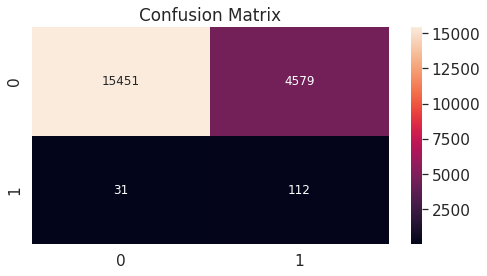

In [313]:
model_df_cm = pd.DataFrame(confusion_matrix, range(2), range(2)) 
plt.figure(figsize = (8, 4)) 
plt.title('Confusion Matrix')
sn.set(font_scale=1.4) #for label size 
sn.heatmap(model_df_cm, annot=True, annot_kws={"size": 12}, fmt="d") # font size 
plt.show()

/tmp/ipykernel_592/1548450874.py:28: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


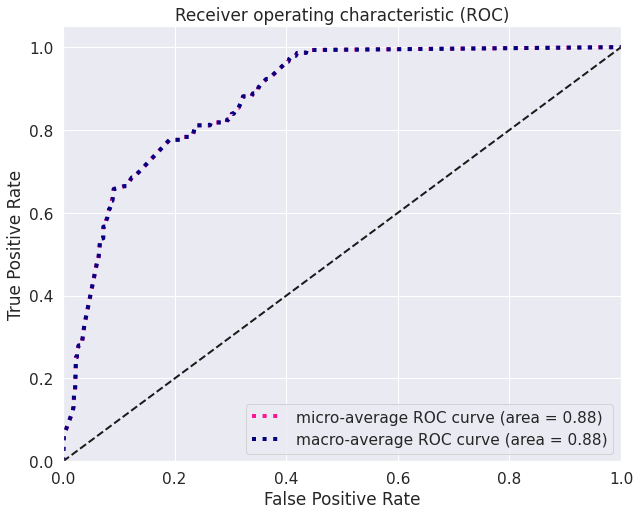

In [314]:
n_classes = 2

plt.figure(figsize = (10, 8)) 

# Plot linewidth.
lw = 2

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred1)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred1.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
# plt.figure(1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes-97), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

### Random Forest Classifier

In [315]:
n_estimators = [10, 25, 50, 75]
max_features = ['auto']
n_jobs = [-1]
class_weight = ['balanced']
criterion = ['gini', 'entropy']
param_grid = dict(n_estimators=n_estimators, max_features=max_features, n_jobs=n_jobs, criterion=criterion,
                  class_weight=class_weight)

In [316]:
# # train model
model2 = RandomForestClassifier()
CV_rf = GridSearchCV(estimator=model2, param_grid=param_grid, scoring=auc_predict_score, cv=3, return_train_score=False)
CV_rf.fit(X_train, y_train)
CV_rf.cv_results_

{'mean_fit_time': array([1.05176592, 0.45519201, 0.21502201, 0.21472653, 0.13734516,
        0.16709073, 0.21464944, 0.22823739]),
 'std_fit_time': array([0.6248188 , 0.47219066, 0.00892453, 0.05543723, 0.00236709,
        0.01304548, 0.00407507, 0.05057035]),
 'mean_score_time': array([0.02208479, 0.033933  , 0.05255723, 0.06614137, 0.01875552,
        0.03109439, 0.05040622, 0.06499521]),
 'std_score_time': array([0.00265372, 0.00481735, 0.0007885 , 0.00076999, 0.00035306,
        0.00149793, 0.00247193, 0.00283545]),
 'param_class_weight': masked_array(data=['balanced', 'balanced', 'balanced', 'balanced',
                    'balanced', 'balanced', 'balanced', 'balanced'],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_criterion': masked_array(data=['gini', 'gini', 'gini', 'gini', 'entropy', 'entropy',
                    'entropy', 'entropy'],
              mask=[False, False, False, False, Fa

In [317]:
print(CV_rf.best_params_)

{'class_weight': 'balanced', 'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 10, 'n_jobs': -1}


In [318]:
# # eval model
# y_pred1 = cross_val_predict(CV_rf, X_test, y_test, cv=3, method='predict_proba')[:, 1]
y_pred1 = CV_rf.predict_proba(X_test)[:, 1]
print('Overall AUC:', roc_auc_score(y_test, y_pred1))
accuracy = accuracy_score(y_test, y_pred1.round(), normalize=True)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

confusion_matrix = confusion_matrix(y_test, y_pred1.round())
print(confusion_matrix)
print(classification_report(y_test, y_pred1.round()))
specificity = confusion_matrix[0, 0] / (confusion_matrix[0, 0] + confusion_matrix[0, 1])
sensitivity = confusion_matrix[1, 1] / (confusion_matrix[1, 0] + confusion_matrix[1, 1])
print("n=%d, Accuracy: %.2f%%, specificity: %.2f%%, sensitivity: %.2f%%" % (
    X_train.shape[1], accuracy * 100.0, specificity * 100.0, sensitivity * 100.0))

Overall AUC: 0.7109533252568699
[[20030     0]
 [  139     4]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     20030
           1       1.00      0.03      0.05       143

    accuracy                           0.99     20173
   macro avg       1.00      0.51      0.53     20173
weighted avg       0.99      0.99      0.99     20173

n=145, Accuracy: 99.31%, specificity: 100.00%, sensitivity: 2.80%


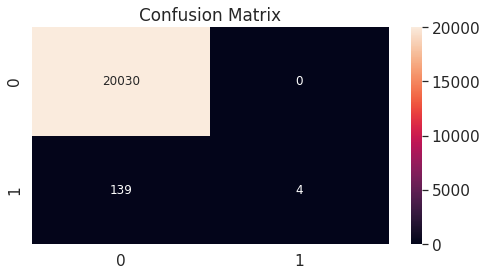

In [319]:
model_df_cm = pd.DataFrame(confusion_matrix, range(2), range(2)) 
plt.figure(figsize = (8, 4)) 
plt.title('Confusion Matrix')
sn.set(font_scale=1.4) #for label size 
sn.heatmap(model_df_cm, annot=True, annot_kws={"size": 12}, fmt="d") # font size 
plt.show()

/tmp/ipykernel_592/1548450874.py:28: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


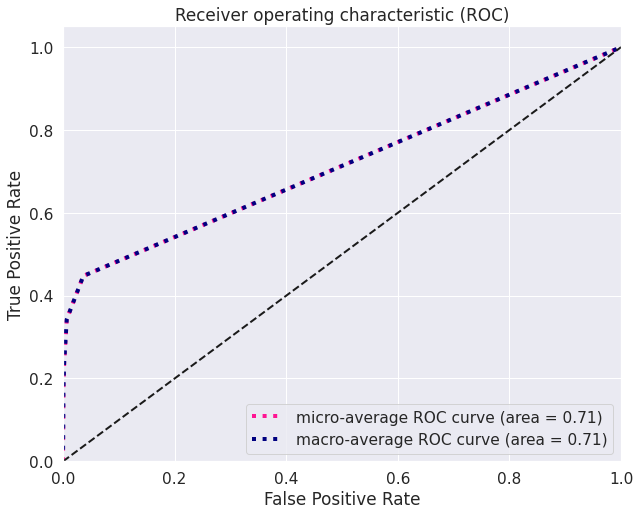

In [320]:
n_classes = 2

plt.figure(figsize = (10, 8)) 

# Plot linewidth.
lw = 2

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred1)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred1.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
# plt.figure(1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes-97), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

### Logistic Regression

In [321]:
C = [1e-3, 1e-2, 1e-1, 1e0, 1e1]
class_weight = ['balanced']
# max_iter = [1e3]
# multi_class = ['multinomial']
param_grid = dict(C=C, class_weight=class_weight)

In [322]:
# # train model
model2 = LogisticRegression()
CV_lr = GridSearchCV(estimator=model2, param_grid=param_grid, scoring=auc_predict_score, cv=3, return_train_score=False)
CV_lr.fit(X_train, y_train)
CV_lr.cv_results_

/home/fkirmani/anaconda3/envs/csce590/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/fkirmani/anaconda3/envs/csce590/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/l

{'mean_fit_time': array([0.11089007, 0.07769156, 0.07515105, 0.07937487, 0.08162363]),
 'std_fit_time': array([0.00541036, 0.00381171, 0.00327908, 0.00157207, 0.00062258]),
 'mean_score_time': array([0.00501466, 0.00354449, 0.00356992, 0.00379634, 0.00376089]),
 'std_score_time': array([8.10002271e-04, 1.44543065e-04, 3.58275428e-05, 8.83612407e-05,
        1.30862242e-04]),
 'param_C': masked_array(data=[0.001, 0.01, 0.1, 1.0, 10.0],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_class_weight': masked_array(data=['balanced', 'balanced', 'balanced', 'balanced',
                    'balanced'],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.001, 'class_weight': 'balanced'},
  {'C': 0.01, 'class_weight': 'balanced'},
  {'C': 0.1, 'class_weight': 'balanced'},
  {'C': 1.0, 'class_weight': 'balanced'},
  {'C': 10.0, 'class_weight': 'balanced'}

In [323]:
print(CV_lr.best_params_)

{'C': 10.0, 'class_weight': 'balanced'}


In [324]:
# # eval model
# y_pred1 = cross_val_predict(CV_rf, X_test, y_test, cv=3, method='predict_proba')[:, 1]
y_pred1 = CV_lr.predict_proba(X_test)[:, 1]
print('Overall AUC:', roc_auc_score(y_test, y_pred1))
accuracy = accuracy_score(y_test, y_pred1.round(), normalize=True)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

confusion_matrix = confusion_matrix(y_test, y_pred1.round())
print(confusion_matrix)
print(classification_report(y_test, y_pred1.round()))
specificity = confusion_matrix[0, 0] / (confusion_matrix[0, 0] + confusion_matrix[0, 1])
sensitivity = confusion_matrix[1, 1] / (confusion_matrix[1, 0] + confusion_matrix[1, 1])
print("n=%d, Accuracy: %.2f%%, specificity: %.2f%%, sensitivity: %.2f%%" % (
    X_train.shape[1], accuracy * 100.0, specificity * 100.0, sensitivity * 100.0))

Overall AUC: 0.6231530326887291
[[16234  3796]
 [   64    79]]
              precision    recall  f1-score   support

           0       1.00      0.81      0.89     20030
           1       0.02      0.55      0.04       143

    accuracy                           0.81     20173
   macro avg       0.51      0.68      0.47     20173
weighted avg       0.99      0.81      0.89     20173

n=145, Accuracy: 80.87%, specificity: 81.05%, sensitivity: 55.24%


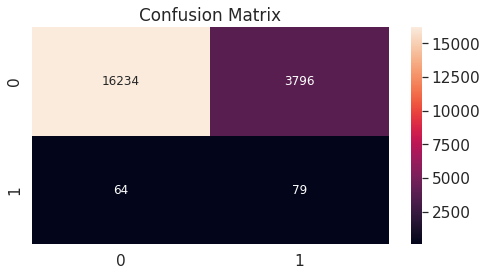

In [325]:
model_df_cm = pd.DataFrame(confusion_matrix, range(2), range(2)) 
plt.figure(figsize = (8, 4)) 
plt.title('Confusion Matrix')
sn.set(font_scale=1.4) #for label size 
sn.heatmap(model_df_cm, annot=True, annot_kws={"size": 12}, fmt="d") # font size 
plt.show()

/tmp/ipykernel_592/1548450874.py:28: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


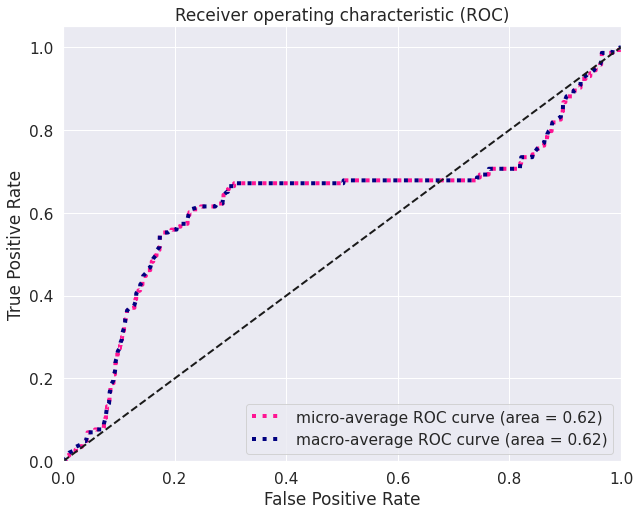

In [326]:
n_classes = 2

plt.figure(figsize = (10, 8)) 

# Plot linewidth.
lw = 2

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred1)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred1.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
# plt.figure(1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes-97), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

### Feature Importance Analysis

In [365]:
# fit model no training data
model = XGBClassifier(max_depth=2, learning_rate=0.01, n_estimators=300, eval_metric='error', 
                      n_jobs=-1)
model.fit(X_train, y_train)

# feature importance
print(model.feature_importances_)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.07016467 0.
 0.         0.         0.         0.         0.         0.
 0.40071002 0.         0.         0.         0.         0.
 0.08193857 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.00284538
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0. 

### Building XGB Classifier on top features

In [431]:
# selected_features = [0, 47, 48, 114, 132, 141, 144]
selected_features = [34, 42, 48, 59, 114, 132, 141, 144]

In [450]:
X_train_selected_feat = X_train.iloc[:, selected_features[0:8]]
X_train_selected_feat = pd.DataFrame(X_train_selected_feat)

In [451]:
X_train_selected_feat.shape

(5043, 8)

In [452]:
X_test_selected_feat = X_test.iloc[:, selected_features[0:8]]
X_test_selected_feat = pd.DataFrame(X_test_selected_feat)

In [441]:
# # train model
model4 = XGBClassifier()
CV_xgb2 = GridSearchCV(estimator=model4, param_grid=xgb_param_grid, scoring=auc_predict_score, cv=3, return_train_score=False)
CV_xgb2.fit(X_train_selected_feat, y_train)
CV_xgb2.cv_results_

{'mean_fit_time': array([0.07425412, 0.183628  , 0.30065409, 0.09226012, 0.32735888,
        0.41019638, 0.13208278, 0.38765407, 0.63358299, 0.06602534,
        0.18166463, 0.29591846, 0.08704448, 0.23966273, 0.37659939,
        0.12603823, 0.31038586, 0.47740984, 0.06684248, 0.18297251,
        0.30201976, 0.09121362, 0.25323224, 0.4116439 , 0.13129139,
        0.38882478, 0.63580934, 0.06617928, 0.1819675 , 0.31184522,
        0.08689221, 0.23723213, 0.38258743, 0.12596242, 0.33322088,
        0.54036856, 0.06743383, 0.18315625, 0.29937832, 0.09037677,
        0.25547338, 0.41403786, 0.13217171, 0.3888526 , 0.62825322,
        0.06577325, 0.17845893, 0.29532067, 0.08586303, 0.23397271,
        0.38193297, 0.12790767, 0.35450697, 0.5872546 ]),
 'std_fit_time': array([0.0082579 , 0.00059726, 0.00185112, 0.00257057, 0.05560334,
        0.00470639, 0.00382891, 0.00824823, 0.0055823 , 0.0003227 ,
        0.00119348, 0.00126798, 0.00016781, 0.00100495, 0.00124976,
        0.00040924, 0.002

In [442]:
print(CV_xgb2.best_params_)

{'eval_metric': 'error', 'gamma': 10, 'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 300, 'n_jobs': -1, 'random_state': 80, 'scale_pos_weight': 143.91954022988506, 'use_label_encoder': False}


In [443]:
# # eval model
# y_pred1 = cross_val_predict(CV_xgb, X_test, y_test, cv=3, method='predict_proba')[:, 1]
y_pred1 = CV_xgb2.predict_proba(X_test_selected_feat)[:, 1]
print('Overall AUC:', roc_auc_score(y_test, y_pred1))
accuracy = accuracy_score(y_test, y_pred1.round(), normalize=True)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

confusion_matrix = confusion_matrix(y_test, y_pred1.round())
print(confusion_matrix)
print(classification_report(y_test, y_pred1.round()))
specificity = confusion_matrix[0, 0] / (confusion_matrix[0, 0] + confusion_matrix[0, 1])
sensitivity = confusion_matrix[1, 1] / (confusion_matrix[1, 0] + confusion_matrix[1, 1])
print("n=%d, Accuracy: %.2f%%, specificity: %.2f%%, sensitivity: %.2f%%" % (
    X_test_selected_feat.shape[1], accuracy * 100.0, specificity * 100.0, sensitivity * 100.0))

Overall AUC: 0.8858322655876325
[[17572  2458]
 [   45    98]]
              precision    recall  f1-score   support

           0       1.00      0.88      0.93     20030
           1       0.04      0.69      0.07       143

    accuracy                           0.88     20173
   macro avg       0.52      0.78      0.50     20173
weighted avg       0.99      0.88      0.93     20173

n=8, Accuracy: 87.59%, specificity: 87.73%, sensitivity: 68.53%


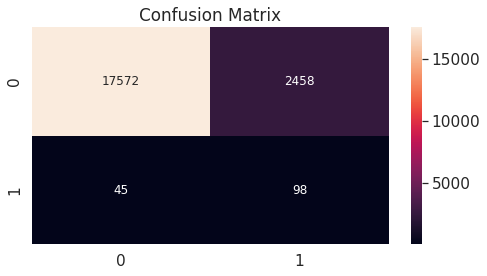

In [444]:
model_df_cm = pd.DataFrame(confusion_matrix, range(2), range(2)) 
plt.figure(figsize = (8, 4)) 
plt.title('Confusion Matrix')
sn.set(font_scale=1.4) #for label size 
sn.heatmap(model_df_cm, annot=True, annot_kws={"size": 12}, fmt="d") # font size 
plt.show()

/tmp/ipykernel_592/1548450874.py:28: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


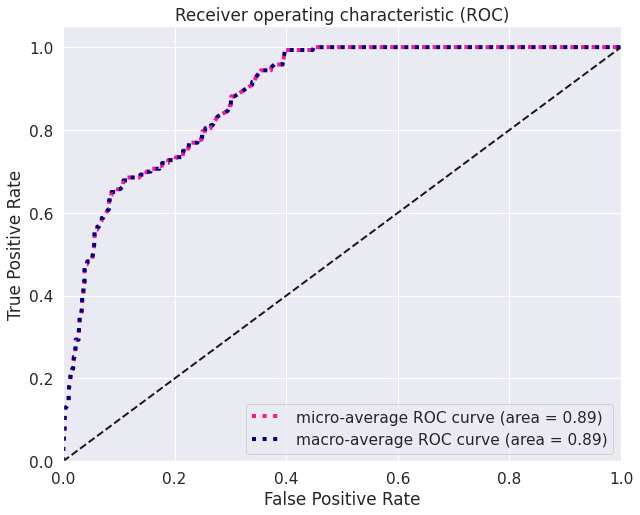

In [445]:
n_classes = 2

plt.figure(figsize = (10, 8)) 

# Plot linewidth.
lw = 2

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred1)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred1.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
# plt.figure(1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes-97), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [453]:
import lime
import lime.lime_tabular

In [454]:
class_names = X_train_selected_feat.columns
X_train_selected_feat = X_train_selected_feat.to_numpy()
X_test_selected_feat = X_test_selected_feat.to_numpy()
# y_train = y_train.to_numpy()
# y_test = y_test.to_numpy()

In [455]:
explainer = lime.lime_tabular.LimeTabularExplainer(X_train_selected_feat, 
                                                   feature_names=class_names, 
                                                   class_names=[0, 1],
                                                   discretize_continuous=True,
                                                   verbose=True)

In [456]:
i = np.random.randint(0, X_test_selected_feat.shape[0])

In [457]:
class_names

Index(['Chla_ugl', 'Cond_umhocm', 'DO_percent', 'Ecoli_100ml', 'Salinity_PSS',
       'TempW_C', 'chlc_ugl', 'pH'],
      dtype='object', name='Parameter')

In [458]:
pd.DataFrame(pd.DataFrame(X_test_selected_feat, columns=class_names).iloc[i,]).transpose()

Parameter  Chla_ugl   Cond_umhocm  DO_percent  Ecoli_100ml  Salinity_PSS  \
10786        13.186  28231.614564   84.617505    841.73822      18.98539   

Parameter    TempW_C  chlc_ugl        pH  
10786      25.570452  1.311167  7.892637

In [472]:
X_test_selected_feat[i]

array([1.31860003e+01, 2.82316146e+04, 8.46175051e+01, 8.41738220e+02,
       1.89853905e+01, 2.08333333e+01, 1.31116721e+00, 7.89263734e+00])

In [470]:
exp = explainer.explain_instance(X_test_selected_feat[i], CV_xgb2.predict_proba, num_features=2)
# exp = exp.as_list()
print(exp)

Intercept 0.412166284426026
Prediction_local [0.59984723]
Right: 0.14160053


In [471]:
exp.show_in_notebook(show_table=True, show_all=False)

In [461]:
feature_index = lambda x: list(class_names).index(x)

In [462]:
feature_index('pH')

7

In [463]:
# print('Decreasing pH to 7.0')
# temp = X_test_selected_feat[i].copy()
# print('P(algal) before:', CV_xgb2.predict_proba(temp.reshape(1,-1))[0,0])
# temp[feature_index('pH')] = 7.0
# print('P(algal) after:', CV_xgb2.predict_proba(temp.reshape(1,-1))[0,0])
# print ()
print('Decreasing Salinity_PSS to 16.0')
temp = X_test_selected_feat[i].copy()
print('P(algal) before:', CV_xgb2.predict_proba(temp.reshape(1,-1))[0,0])
temp[feature_index('Salinity_PSS')] = 16.0
print('P(algal) after:', CV_xgb2.predict_proba(temp.reshape(1,-1))[0,0])
print()
# print('Increasing DO_percent')
# temp = X_test_selected_feat[i].copy()
# print('P(algal) before:', CV_xgb2.predict_proba(temp.reshape(1,-1))[0,0])
# temp[feature_index('DO_percent')] = 90.0
# print('P(algal) after:', CV_xgb2.predict_proba(temp.reshape(1,-1))[0,0])
# print()
# print('Increasing DO_mgl')
# temp = X_test_selected_feat[i].copy()
# print('P(algal) before:', CV_xgb2.predict_proba(temp.reshape(1,-1))[0,0])
# temp[feature_index('DO_mgl')] = 8.0
# print('P(algal) after:', CV_xgb2.predict_proba(temp.reshape(1,-1))[0,0])
# print()
# print('Increasing chlc_ugl')
# temp = X_test_selected_feat[i].copy()
# print('P(algal) before:', CV_xgb2.predict_proba(temp.reshape(1,-1))[0,0])
# temp[feature_index('chlc_ugl')] = 1.0
# print('P(algal) after:', CV_xgb2.predict_proba(temp.reshape(1,-1))[0,0])
# print()
print('Decreasing TempW_C to 23.0')
temp = X_test_selected_feat[i].copy()
print('P(algal) before:', CV_xgb2.predict_proba(temp.reshape(1,-1))[0,0])
temp[feature_index('TempW_C')] = 23.0
print('P(algal) after:', CV_xgb2.predict_proba(temp.reshape(1,-1))[0,0])
print()
print('Decreasing pH and Salinity_PSS and TempW_C')
temp = X_test_selected_feat[i].copy()
print('P(algal) before:', CV_xgb2.predict_proba(temp.reshape(1,-1))[0,0])
temp[feature_index('pH')] = 7.5
temp[feature_index('Salinity_PSS')] = 16.0
temp[feature_index('TempW_C')] = 23.0
print('P(algal) after:', CV_xgb2.predict_proba(temp.reshape(1,-1))[0,0])

Decreasing Salinity_PSS to 16.0
P(algal) before: 0.928743
P(algal) after: 0.6286139

Decreasing TempW_C to 23.0
P(algal) before: 0.928743
P(algal) after: 0.85839945

Decreasing pH and Salinity_PSS and TempW_C
P(algal) before: 0.928743
P(algal) after: 0.39380783


In [464]:
exp.show_in_notebook(show_table=True, show_all=True)